In [1]:
# Import necessary libraries
import tensorflow as tf # Machine learning library
import csv
import numpy as np # Math library
import matplotlib.pyplot as plt # Plotting library

In this simple example, we construct a tensorflow model to predict dangerous situations from raw sensor data.

# Part 1: Load sensor data

In [2]:
# Open file with data from one sensor
filepath = '/Users/oskar/Downloads/test_data_1.csv'
f = open(filepath, 'r')

In [3]:
# Read data into python variable
reader = csv.reader(f, delimiter=',')

In [4]:
# Get values from first column and all rows (i.e. temperature)
values = [float(r[:][0]) for r in reader]

In [5]:
# Make a scatter plot of time vs. temperature
plt.scatter(range(len(values)), values)

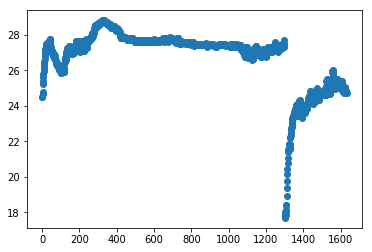

In [6]:
plt.show()

# Part 2: Data pre-processing

This is the part where we define what we want out model to do. Imagine a situation where we have recorded data, where the rapid increase in temperature is considered a hazardous situation. This would be easy to code by hand, but imagine a situation where we have hundreds of sensors and we only know what the raw sensor values have been during past/simulated hazardous situations. In that case we would need a robust model able to generalize to new and high-dimensional data.

In this case, we consider data points below 24 degrees to be in the "hazard" zone. We do not want the model to learn just based on the observed values (that would be trivial), but rather based on the kind change with respect to the surrounding data points.

In [7]:
# Make each data point into a vector of surrounding data points. 
# If you have many sensors, you can e.g. concatenate all the sensor values into one big vector.
data = [values[i-5:i+5] for i in range(10, len(values) - 10)]

In [8]:
# We make our labels into "one-hot vectors" i.e. [1 0] denotes hazard situation and [0 1] normal situation
labels = np.array([np.array([1, 0]) if i < 24 else np.array([0, 1]) for i in values[10:len(values)-10]])

# Part 3: Define model to detect danger

We are using a neural network with two hidden layers to classify the temperature values. A neural network consists of many "layers" of non linear functions. Each layer has learnable parameters that get adjusted during training. This is done by computing gradients and applying the error back propagation algorithm, but tensorflow makes this very easy for us.

In [10]:
hidden_units = 10 # How many "neurons" in each hidden layer
learning_rate = 1e-4 # How fast we learn (How much we update our learning parameters in each iteration)
input_size = 10 # We have a vector of 10 surrounding data points for each data point
output_size = 2 # We have 2 classes (danger and no danger)

In [11]:
inputs = tf.placeholder(tf.float32, [None, input_size]) # Symbolic input to tf graph
lab = tf.placeholder(tf.float32, [None, output_size]) # Symbolic label to tf graph

In [12]:
W = tf.Variable(tf.truncated_normal(shape=[input_size, hidden_units])) # Weights for first layer
b = tf.Variable(tf.constant(0.1, shape=[1, hidden_units])) # Bias for first layer

In [13]:
W1 = tf.Variable(tf.truncated_normal(shape=[hidden_units, hidden_units]))
b1 = tf.Variable(tf.constant(0.1, shape=[1,hidden_units]))

In [14]:
out_weights = tf.Variable(tf.truncated_normal(shape=[hidden_units, output_size]))
out_bias = tf.Variable(tf.constant(0.1, shape=[1,output_size]))

In [15]:
# One layer consists of multiplication with weight matrix, addition of bias and a non-linear function
hidden_layer = tf.nn.sigmoid(tf.matmul(inputs, W) + b)

In [16]:
hidden_layer_2 = tf.nn.sigmoid(tf.matmul(hidden_layer, W1) + b1)

In [17]:
# The last layer is the output of the model
output = tf.matmul(hidden_layer_2, out_weights) + out_bias

In [18]:
# Define loss function (measure of how close predictions are to labels)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=lab))

In [19]:
# Define training operation
training = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [20]:
classification = tf.argmax(output, 1)

In [21]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [27]:
for i in range(10000):
    sess.run(training, feed_dict={inputs: data, lab: labels})
    if i % 1000 == 0:
        print "loss: ", loss.eval(feed_dict={inputs: data, lab: labels})

loss:  0.11564
loss:  0.108532
loss:  0.101802
loss:  0.0953273
loss:  0.0890979
loss:  0.0831212
loss:  0.0774244
loss:  0.0720592
loss:  0.0670658
loss:  0.0624899


# Part 4: Use the model

In [28]:
# Make a python function for predicting based on raw data
def predict(data):
    return output.eval(feed_dict={inputs: data})

In [29]:
# Use the function
p = predict(data)[:, 1]

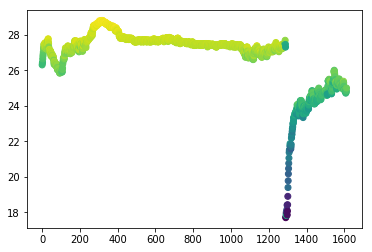

In [30]:
# Plot output condifences for training set inputs. Darker values indicate bigger risk levels.
plt.scatter(range(len(p)), values[10:-10], c=p)
plt.show()